In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
!pip install wordcloud
#Data Analysis
import re
import nltk
# Ensure that the necessary NLTK datasets are downloaded
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer



#Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Importing the dataset

In [5]:
df = pd.read_csv("ADHD.csv")
df.head()

<ipython-input-5-2c26937a88ee>:1: DtypeWarning: Columns (2,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("ADHD.csv")


,title,selftext,score,id,url,num_comments,created_utc,created_datetime
0,Android app to strengthen attention/focus,"Hey /r/ADHD,\n\nCheck out my simple Android ap...",6,k348a,https://www.reddit.com/r/ADHD/comments/k348a/a...,7.0,1315014480.0,2011-09-03 01:48:00
1,Does anyone here have experience with Imipramine?,My doctor has suggested it for ADD with anxiet...,4,k3gdz,https://www.reddit.com/r/ADHD/comments/k3gdz/d...,1.0,1315051084.0,2011-09-03 11:58:04
2,"New study shows that for people with ADHD, \n""...",NaN,22,k4q79,http://www.utexas.edu/features/2011/08/29/adhd...,11.0,1315174374.0,2011-09-04 22:12:54
3,What does the ADHD test look like?,I'm 21 and didn't know about ADHD until recent...,6,k5fvd,https://www.reddit.com/r/ADHD/comments/k5fvd/w...,10.0,1315239683.0,2011-09-05 16:21:23
4,Are you guys good with maps and directions?,It seems like one thing I've always been reall...,0,k6efi,https://www.reddit.com/r/ADHD/comments/k6efi/a...,0.0,1315317191.0,2011-09-06 13:53:11


In [6]:
df.shape
df=df.head(15000)

In [7]:
## Droping off unnecessay columns
df= df[["title","selftext","score"]]
df

,title,selftext,score
0,Android app to strengthen attention/focus,"Hey /r/ADHD,\n\nCheck out my simple Android ap...",6
1,Does anyone here have experience with Imipramine?,My doctor has suggested it for ADD with anxiet...,4
2,"New study shows that for people with ADHD, \n""...",NaN,22
3,What does the ADHD test look like?,I'm 21 and didn't know about ADHD until recent...,6
4,Are you guys good with maps and directions?,It seems like one thing I've always been reall...,0
...,...,...,...
14995,Are there doctors with ADHD around here?,[removed],10
14996,DAE on adderall feel like they only have two m...,[removed],1
14997,Is it normal on adderall to feel like you only...,I'm in college and taking time-consuming upper...,11
14998,WHY THERE IS NO SUCH THING AS ADHD - PI,[removed],0


### EDA AND CLEANING

In [8]:
# data types
df.dtypes

title       object
selftext    object
score       object
dtype: object

In [9]:
# before cleaning
num_columns_b = df.shape[1]
num_rows_b = df.shape[0]
print(f"""Dataframe Dimensions Before Cleaning
Columns = {num_columns_b}
Rows = {num_rows_b}""")

Dataframe Dimensions Before Cleaning
Columns = 3
Rows = 15000


In [10]:
# Find Null or NaN values
df.isna().sum()

title          0
selftext    1743
score          0
dtype: int64

In [11]:
# Drop Null values in title and selftext
df = df.dropna()

#After dropping null values
df.isna().sum()

title       0
selftext    0
score       0
dtype: int64

In [12]:
#Drop rows with deleted or removed text

columns_to_clean = ['title','selftext']

# Function to check if a cell is exactly 'deleted' or 'removed'
def check_exact_match(cell):
    return cell == '[deleted]' or cell == '[removed]'

#before removal
count_rows_b = df[df[columns_to_clean].applymap(check_exact_match).any(axis=1)].shape[0]
print(f"Number of 'Deleted' or 'Removed' Posts: {count_rows_b}")

# Drop rows where any of the specified columns have 'deleted' or 'removed'
df = df[~df[columns_to_clean].applymap(check_exact_match).any(axis=1)]

Number of 'Deleted' or 'Removed' Posts: 5306


In [13]:
# Update column name
df.rename(columns={'selftext': 'post'}, inplace=True)

<ipython-input-13-164179a3fe17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'selftext': 'post'}, inplace=True)


In [14]:
# Calculate character length of title and posts
df['len_title'] = df['title'].apply(lambda x: len(x) if pd.notnull(x) else 0)
df['len_post'] = df['post'].apply(lambda x: len(x) if pd.notnull(x) else 0)
df.head()

<ipython-input-14-20a3de9bffe7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['len_title'] = df['title'].apply(lambda x: len(x) if pd.notnull(x) else 0)
<ipython-input-14-20a3de9bffe7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['len_post'] = df['post'].apply(lambda x: len(x) if pd.notnull(x) else 0)


,title,post,score,len_title,len_post
0,Android app to strengthen attention/focus,"Hey /r/ADHD,\n\nCheck out my simple Android ap...",6,41,988
1,Does anyone here have experience with Imipramine?,My doctor has suggested it for ADD with anxiet...,4,49,146
3,What does the ADHD test look like?,I'm 21 and didn't know about ADHD until recent...,6,34,677
4,Are you guys good with maps and directions?,It seems like one thing I've always been reall...,0,44,553
5,Just started Concerta today any advice/experie...,"I am now 32, I was on Ritalin from the age of ...",7,77,1062


In [15]:
# average title and post length
print(f'''Average Title Length = {(df['len_title']).mean().round()} characters''')
print(f'''Average Post Length = {(df['len_post']).mean().round()} characters''')

Average Title Length = 64.0 characters
Average Post Length = 1165.0 characters


In [16]:
import nltk
from nltk.stem import WordNetLemmatizer

In [17]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [18]:
 # Function to preprocess text and extract and filter POS Tags
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Split words separated by a slash
    text = text.replace('/', ' ')

    # Retain medication dosages (e.g., 70mg, 150mg) and 'tl;dr'
    dosages_and_phrases = re.findall(r'\b\d+mg\b|tl;dr', text)

    # Remove special characters except apostrophes, retain spaces, and keep 'tl;dr'
    text = re.sub(r'(?<!tl);(?<!dr)|[^a-zA-Z\s\';]', ' ', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Stopwords removal
    custom_words = ['something', 'im', 'dont', 'thing', 'going', 'getting', 'people',
                    'someone', 'everyone', 'nothing', 'ive', 'id', 'thank', 'thats',
                    'didnt', 'much', 'lot', 'isnt', 'stuff', 'right', 'sure', 'word',
                    'way', 'anything', 'everything', 'others', 'cant', "i'm", "don't",
                    "i've", "i'd", "that's", "didn't", "isn't", "can't", "s", "guy", "wa", "day", "week", "month"]
    stop_words = set(stopwords.words('english'))
    stop_words = stop_words.union(custom_words)
    filtered_tokens = [word for word in lemmatized_tokens if word not in stop_words]

    # POS tagging
    tagged_tokens = pos_tag(filtered_tokens)

    # Filter out tokens that are not relevant
    POS_text = [word for word, tag in tagged_tokens if tag in ['VBG', 'VBN', 'NN', 'NNP', 'NNS', 'NNPS', 'JJ', 'JJR', 'JJS', 'RBR', 'POS']]

    # Reinsert dosages and phrases like 'tl;dr' into the text
    final_tokens = POS_text + dosages_and_phrases

    # Final text
    final_text = ' '.join(final_tokens)
    return final_text

In [19]:
# Preprocess the text columns (assuming 'title' and 'selftext' are the relevant columns)
df['title'] = df['title'].apply(lambda x: preprocess_text(x))
df['post'] = df['post'].apply(lambda x: preprocess_text(x))

# Display the first few rows of the processed data
df.head()

,title,post,score,len_title,len_post
0,android app strengthen attention focus,hey r simple android app attention exercise ht...,6,41,988
1,anyone experience imipramine,doctor ha add anxiety issue anyone,4,49,146
3,doe adhd test look,short found 's web parent think 's condition '...,6,34,677
4,good map direction,good learning place learning map little car ri...,0,44,553
5,started concerta today experience long time ad...,ritalin age untill tremendous difficulty funct...,7,77,1062


In [20]:
#after cleaning
num_columns_a = df.shape[1]
num_rows_a = df.shape[0]
print(f"""Dataframe Dimensions After Cleaning
Columns = {num_columns_a}
Rows = {num_rows_a}""")

print(f"""Difference
Rows = {((num_rows_a - num_rows_b)/((num_rows_a+num_rows_b)/2))*100:.2f}%""")

Dataframe Dimensions After Cleaning
Columns = 5
Rows = 7951
Difference
Rows = -61.43%


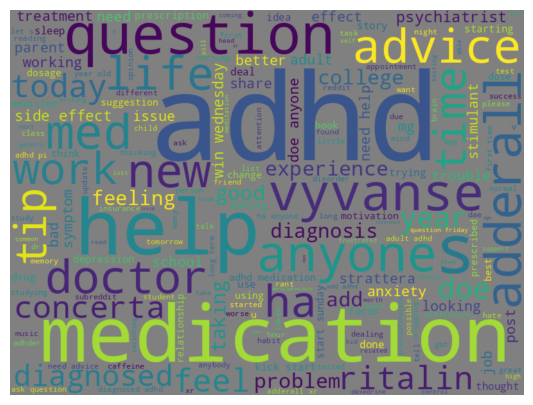

In [21]:
# Visualizing Title Wordcloud
title_text = " ".join(df['title'].dropna().astype(str))

wordcloud = WordCloud(background_color="gray", width = 800, height = 600).generate(title_text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

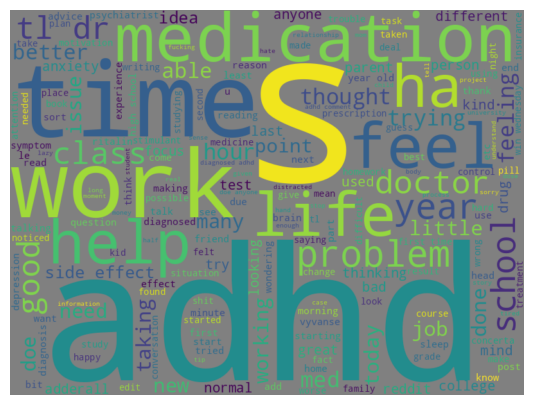

In [22]:
# Visualizing selftext Wordcloud
post_text = " ".join(df['post'].dropna().astype(str))

wordcloud = WordCloud(background_color="gray", width = 800, height = 600).generate(post_text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

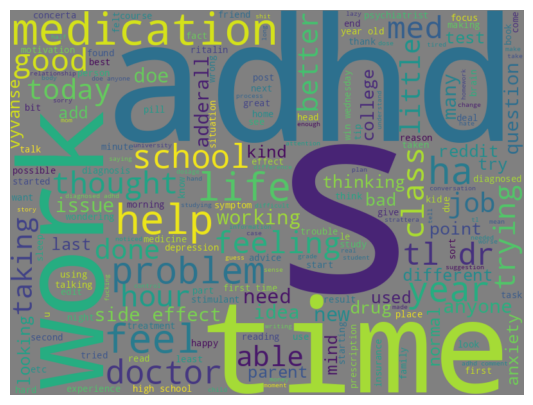

In [23]:
# Visualizing all text Wordcloud
all_text = title_text + post_text

wordcloud = WordCloud(background_color="gray", width = 800, height = 600).generate(all_text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


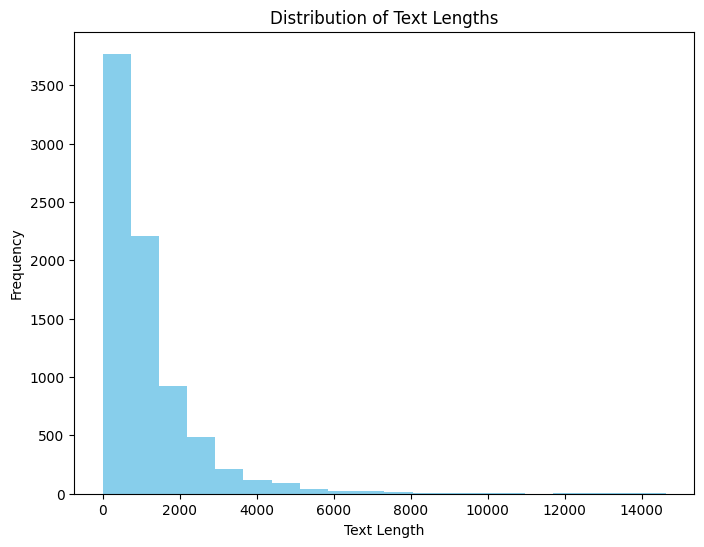

In [24]:
# Plot text length distribution
plt.figure(figsize=(8, 6))
plt.hist(df['len_post'], bins=20, color='skyblue')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [25]:
df['score'].head(10)

0      6
1      4
3      6
4      0
5      7
6      1
8     11
11     5
13     0
14     1
Name: score, dtype: object

In [26]:
df['score'] = df['score'].apply(lambda x: int(x) if str(x).isdigit() else np.nan)

In [27]:
df = df.dropna(subset=['score'])

In [28]:
df['score'].isna().sum()



0

In [29]:
df['score'] = df['score'].astype(np.int64)

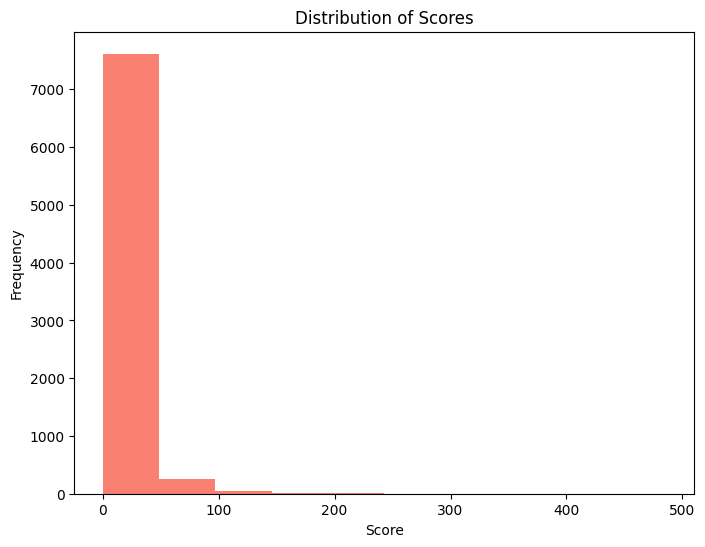

In [30]:
# Score Distribution
plt.figure(figsize=(8, 6))
plt.hist(df['score'], bins=10, color='salmon')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

In [31]:
df['score'].unique()
def cate(x):
  if x>300:
    return 4 ## individual has ADHD
  elif x>150:
    return 3 ## mild ADHD
  elif x>100:
    return 2 ## person is experiencing  ADHD sympton
  elif x<50:
    return 1 ## person might noticing ADHD
  else:
    return 0 ## person does not have ADHD
df['score'] = df['score'].apply(cate)


In [32]:
df

,title,post,score,len_title,len_post
0,android app strengthen attention focus,hey r simple android app attention exercise ht...,1,41,988
1,anyone experience imipramine,doctor ha add anxiety issue anyone,1,49,146
3,doe adhd test look,short found 's web parent think 's condition '...,1,34,677
4,good map direction,good learning place learning map little car ri...,1,44,553
5,started concerta today experience long time ad...,ritalin age untill tremendous difficulty funct...,1,77,1062
...,...,...,...,...,...
14989,radhdtors uncle john 's bathroom reader simila...,uninitiated 's photo th anniversary edition ht...,1,106,520
14991,doe help,brief switch drinking tree front screen clean ...,1,25,1125
14993,explain idea,design lesson plan rhetorical device letter ed...,1,50,1283
14997,normal mode autopilot complete utter exhaustion,college taking time consuming upper level clas...,1,113,823


In [33]:
## removing the Hmtl tag from the text
import re
df['post'] = df['post'].astype(str)

def remove_html_tag(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

df['post']= df['post'].apply(remove_html_tag)
df['title']= df['title'].apply(remove_html_tag)

In [34]:
## Removing URL
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'', text)


df['post']= df['post'].apply(remove_url)
df['title']= df['title'].apply(remove_url)

### Remove puncutuaion

In [35]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
exclude = string.punctuation

def remove_punc(text):
    for char in exclude:
        text = text.replace(char,'')
    return text




df['post']= df['post'].apply(remove_punc)
df['title']= df['title'].apply(remove_punc)

In [37]:
## Removing the acromins from the sentence

chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From",
    "W8": "Wait...",
    "7K": "Sick:-D Laughter",
    "TFW": "That Feeling When",
    "MFW": "My Face When",
    "MRW": "My Reaction When",
    "IFYP": "I Feel Your Pain",
    "LOL": "Laughing Out Loud",
    "TNTL": "Trying Not To Laugh",
    "JK": "Just Kidding",
    "IDC": "I Don't Care",
    "ILY": "I Love You",
    "IMU": "I Miss You",
    "ADIH": "Another Day In Hell",
    "IDC": "I Don't Care",
    "ZZZ": "Sleeping, Bored, Tired",
    "WYWH": "Wish You Were Here",
    "TIME": "Tears In My Eyes",
    "BAE": "Before Anyone Else",
    "FIMH": "Forever In My Heart",
    "BSAAW": "Big Smile And A Wink",
    "BWL": "Bursting With Laughter",
    "LMAO": "Laughing My A** Off",
    "BFF": "Best Friends Forever",
    "CSL": "Can't Stop Laughing",
    "IDK": "I Don't Know",
    "OMG": "Oh My God",
    "SMH": "Shaking My Head",
    "YOLO": "You Only Live Once",
    "FOMO": "Fear Of Missing Out",
    "DM": "Direct Message",
    "TL;DR": "Too Long; Didn't Read",
    "IMO": "In My Opinion",
    "IMHO": "In My Humble Opinion",
    "OOTD": "Outfit Of The Day",
    "ROFL:": "Rolling On the Floor Laughing",
    "TMI": "Too Much Information",
    "ICYMI": "In Case You Missed It",
    "TIL": "Today I Learned",
    "AMA": "Ask Me Anything",
    "ICYMI": "In Case You Missed It",
    "NSFW": "Not Safe For Work",
    "FIFY": "Fixed It For You",
    "BFFL": "Best Friends For Life",
    "TBH": "To Be Honest",
    "NSFL": "Not Safe For Life",
    "SMH": "Shake My Head",
    "IRL": "In Real Life",
    "BRB": "Be Right Back",
    "MIA": "Missing In Action",
    "NVM": "Never Mind",
    "OMW": "On My Way",
    "WTH": "What The Heck",
    "ICYMI": "In Case You Missed It",
    "YOLO": "You Only Live Once",
    "OML": "Oh My Lord",
    "WIP": "Work In Progress",
    "AFAIC": "As Far As I'm Concerned",
    "BFFAE": "Best Friends Forever And Ever",
    "BMS": "Broke My Scale",
    "FOMCL": "Fell Out Of My Chair Laughing",
    "FYA": "For Your Amusement",
    "TBT": "Throwback Thursday",
    "WCW": "Woman Crush Wednesday",
    "TBH": "To Be Honest",
    "WCE": "Woman Crush Everyday",
    "DMs": "Direct Messages",
    "WFH": "Work From Home",
    "DMV": "Department of Motor Vehicles",
    "ICYM": "In Case You Missed",
    "NSFR": "Not Safe For Reality",
    "AMA": "Ask Me Anything",
}
def chat_conversion(text):
    new_text = []
    for word in text.split():
        if word.upper() in chat_words:
            new_text.append(chat_words[word.upper()])
        else:
            new_text.append(word)
    return " ".join(new_text)

# Assuming df is your DataFrame

df['post']= df['post'].apply(chat_conversion)
df['title']= df['title'].apply(chat_conversion)

## Removoing Stopwords

In [38]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Data Preprocessing

In [39]:
df.isnull().sum()


title        0
post         0
score        0
len_title    0
len_post     0
dtype: int64

In [40]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [41]:
df.head()

,title,post,score,len_title,len_post
0,android app strengthen attention focus,hey r simple android app attention exercise ht...,1,41,988
1,anyone experience imipramine,doctor ha add anxiety issue anyone,1,49,146
3,doe adhd test look,short found s web parent think s condition s o...,1,34,677
4,good map direction,good learning place learning map little car ri...,1,44,553
5,started concerta today experience long Tears I...,ritalin age untill tremendous difficulty funct...,1,77,1062


In [42]:

import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report



In [43]:
def preprocess_text(text):
  """
  Preprocesses text data by tokenization, stop-word removal, and stemming.
  """
  stop_words = stopwords.words('english')
  stemmer = PorterStemmer()
  tokens = [stemmer.stem(word.lower()) for word in text.split() if word not in stop_words]
  return " ".join(tokens)

In [44]:
# Preprocess text data
df["post"] = df["post"].apply(preprocess_text)

In [45]:
# Define function to extract TF-IDF features
def extract_sentiment_features(data):
  """
  Extracts TF-IDF features from the preprocessed text data.
  """
  vectorizer = TfidfVectorizer()
  features = vectorizer.fit_transform([text for text in data["post"]])
  return features

In [46]:
# Extract features
X = extract_sentiment_features(df)

In [47]:
# Define target variable (assuming score represents a binary classification for ADHD)
y = df["score"]  # Assuming higher scores indicate possible ADHD

In [48]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [59]:
# Define function to build and evaluate models
def build_and_evaluate(X_train, X_test, y_train, y_test):
    """
    Builds SVM and Naive Bayes classifiers, predicts on test data, and evaluates performance.
    """
    # Build SVM classifiers
    svm_classifiers = []
    for i in range(5):
        svm_classifiers.append(('SVM' + str(i), SVC()))
        svm_classifiers[-1][1].fit(X_train, y_train)

    # Build Naive Bayes classifiers
    nb_classifiers = []
    for i in range(5):
        nb_classifiers.append(('NB' + str(i), MultinomialNB()))
        nb_classifiers[-1][1].fit(X_train, y_train)

    # Voting ensemble
    ensemble = VotingClassifier(estimators=svm_classifiers + nb_classifiers, voting='hard')
    ensemble.fit(X_train, y_train)
    predictions = ensemble.predict(X_test)

    # Evaluate model performance
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)

    # Calculate additional performance metrics
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    return predictions

In [60]:
# Build and evaluate models
predictions = build_and_evaluate(X_train, X_test, y_train, y_test)

# Print predictions (for educational purposes only)
print("\nADHD detection results based on sentiment analysis (for educational purposes only):")
print(predictions)

Accuracy: 0.9502831969792322
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.95      1.00      0.97      1510
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         2

    accuracy                           0.95      1589
   macro avg       0.19      0.20      0.19      1589
weighted avg       0.90      0.95      0.93      1589

Precision: 0.9030381544610703
Recall: 0.9502831969792322
F1-score: 0.9260584881824077

ADHD detection results based on sentiment analysis (for educational purposes only):
[1 1 1 ... 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

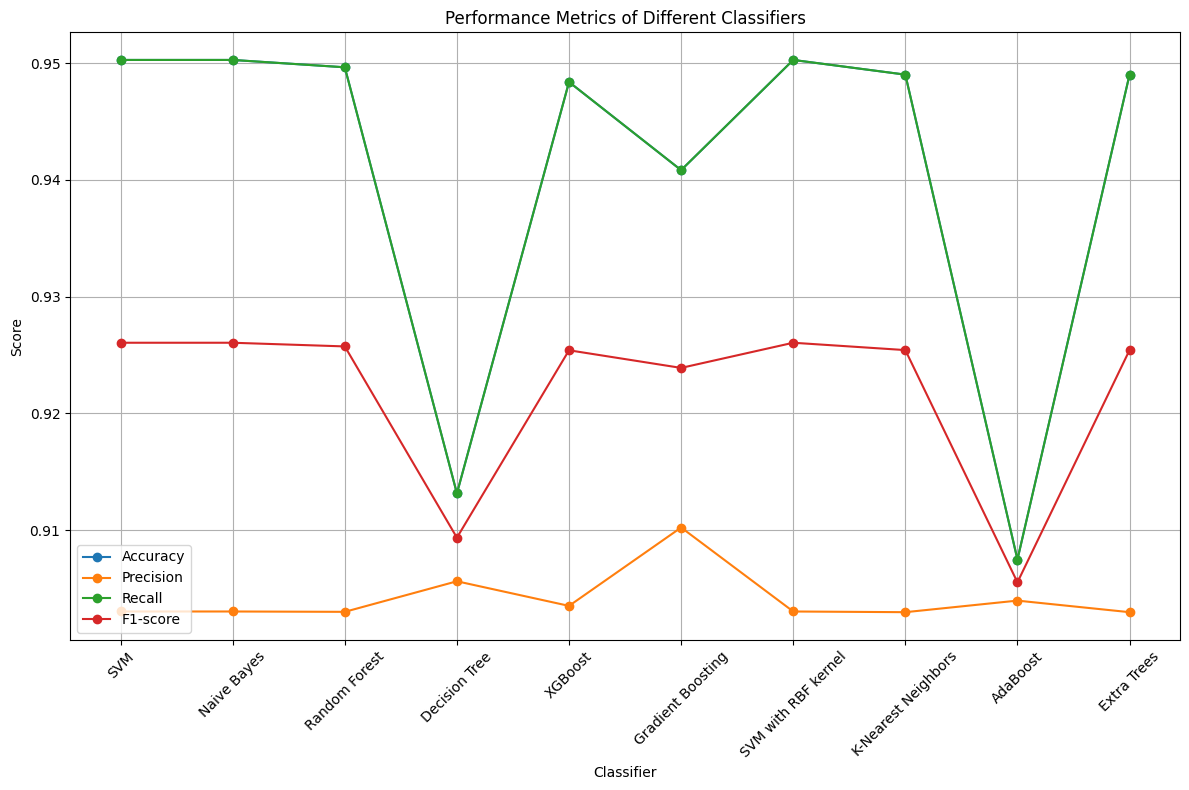

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split



# Define classifiers
classifiers = {
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM with RBF kernel": SVC(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Extra Trees": ExtraTreesClassifier()
}

# Initialize lists to store performance metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Plot performance metrics
labels = list(classifiers.keys())
x = np.arange(len(labels))

plt.figure(figsize=(12, 8))

plt.plot(x, accuracy_scores, label='Accuracy', marker='o')
plt.plot(x, precision_scores, label='Precision', marker='o')
plt.plot(x, recall_scores, label='Recall', marker='o')
plt.plot(x, f1_scores, label='F1-score', marker='o')

plt.xticks(x, labels, rotation=45)
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Performance Metrics of Different Classifiers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [54]:

!pip install tabulate
from tabulate import tabulate

# Create a list of lists containing classifier names and their respective metrics
data = []
for name, accuracy, precision, recall, f1 in zip(classifiers.keys(), accuracy_scores, precision_scores, recall_scores, f1_scores):
    data.append([name, accuracy, precision, recall, f1])

# Print the table
print(tabulate(data, headers=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1-score'], tablefmt='grid'))


+---------------------+------------+-------------+----------+------------+
| Classifier          |   Accuracy |   Precision |   Recall |   F1-score |
+=====================+============+=============+==========+============+
| SVM                 |   0.950283 |    0.903038 | 0.950283 |   0.926058 |
+---------------------+------------+-------------+----------+------------+
| Naive Bayes         |   0.950283 |    0.903038 | 0.950283 |   0.926058 |
+---------------------+------------+-------------+----------+------------+
| Random Forest       |   0.949654 |    0.903008 | 0.949654 |   0.925744 |
+---------------------+------------+-------------+----------+------------+
| Decision Tree       |   0.918817 |    0.905713 | 0.918817 |   0.912164 |
+---------------------+------------+-------------+----------+------------+
| XGBoost             |   0.948395 |    0.903518 | 0.948395 |   0.925413 |
+---------------------+------------+-------------+----------+------------+
| Gradient Boosting   |  

In [57]:
metrics_dict = {
    'Classifier': list(classifiers.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-score': f1_scores
}

# Create a DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Print the DataFrame
metrics_df

,Classifier,Accuracy,Precision,Recall,F1-score
0,SVM,0.950283,0.903038,0.950283,0.926058
1,Naive Bayes,0.950283,0.903038,0.950283,0.926058
2,Random Forest,0.949654,0.903008,0.949654,0.925744
3,Decision Tree,0.918817,0.905713,0.918817,0.912164
4,XGBoost,0.948395,0.903518,0.948395,0.925413
5,Gradient Boosting,0.936438,0.907083,0.936438,0.921092
6,SVM with RBF kernel,0.950283,0.903038,0.950283,0.926058
7,K-Nearest Neighbors,0.949025,0.902979,0.949025,0.925429
8,AdaBoost,0.907489,0.903970,0.907489,0.905538
9,Extra Trees,0.949654,0.906695,0.949654,0.926777


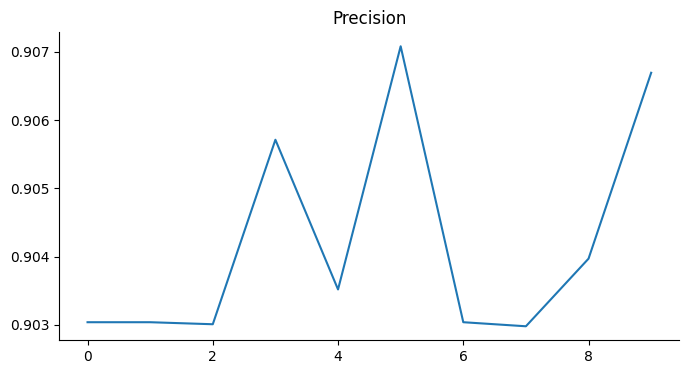

In [58]:
# @title Precision

from matplotlib import pyplot as plt
metrics_df['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)